# PLAN

- [x] plan
- [x] acquire
- [x] prepare
- [x] explore
- [ ] modeling
- [ ] deployment
- [ ] maintenance

## Project Description

Customer churn happens when customers stop using a company's services or cancel their subscriptions. This impacts the company's income, growth, and customer loyalty. By understanding why customers leave, businesses can find ways to keep them happy, reduce churn, and improve retention. They can also use tools to predict when customers might leave and take steps to keep them from doing so.

**This project explores the dataset and predictis whether a customer will churn or not churn.**

These datasets contains 12 feature columns. In detail, these are:

**CustomerID:** A unique identifier for each customer  
**Age:** The age of the customer  
**Gender:** Gender of the customer  
**Tenure:** Duration in months for which a customer has been using the company's products or services  
**Usage Frequency:** Number of times that the customer has used the company’s services in the last month  
**Support Calls:** Number of calls that the customer has made to the customer support in the last month  
**Payment Delay:** Number of days that the customer has delayed their payment in the last month  
**Subscription Type:** Type of subscription the customer has choosen  
**Contract Length:** Duration of the contract that the customer has signed with the company  
**Total Spend:** Total amount of money the customer has spent on the company's products or services  
**Last Interaction:** Number of days since the last interaction that the customer had with the company  
**Churn:** Binary label indicating whether a customer has churned (1) or not (0)  

## Environment

In [1]:
# Setting the random seed for reproducibility
import random
random.seed(493)

# For manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# For modeling
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# ACQUIRE

Let's get the data.

In [2]:
# Read a csv file
df_test = pd.read_csv('../data/in/customer_churn_dataset-testing-master.csv')
df_train = pd.read_csv('../data/in/customer_churn_dataset-training-master.csv')

In [3]:
# The two sets were split in an imbalanced way so let's combine the two sets together and split them later
df = pd.concat([df_test, df_train], axis=0) 
df.reset_index(drop=True, inplace=True)

Let's take a peek and get to know our dataframe.

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [5]:
# Summary stats for the numberical columns
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# Summary stats for the non-numerical columns
df.describe(include=[object]) 

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [7]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [8]:
# Sanity check
df.shape

(505207, 12)

# PREPARE

Let's now do a few transformation to prepare our dataframe for analysis.

In [9]:
# Removing the unnecessary column
df.drop(columns='CustomerID', inplace=True)

In [10]:
# Renaming the column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [11]:
df.head().T

,0,1,2,3,4
age,22.0,41.0,47.0,35.0,53.0
gender,Female,Female,Male,Male,Female
tenure,25.0,28.0,27.0,9.0,58.0
usage_frequency,14.0,28.0,10.0,12.0,24.0
support_calls,4.0,7.0,2.0,5.0,9.0
payment_delay,27.0,13.0,29.0,17.0,2.0
subscription_type,Basic,Standard,Premium,Premium,Standard
contract_length,Monthly,Monthly,Annual,Quarterly,Annual
total_spend,598.0,584.0,757.0,232.0,533.0
last_interaction,9.0,20.0,21.0,18.0,18.0


In [12]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
age,1,0.000198,0,0.0,0,0.0
gender,1,0.000198,0,0.0,0,0.0
tenure,1,0.000198,0,0.0,0,0.0
usage_frequency,1,0.000198,0,0.0,0,0.0
support_calls,1,0.000198,0,0.0,0,0.0
payment_delay,1,0.000198,0,0.0,0,0.0
subscription_type,1,0.000198,0,0.0,0,0.0
contract_length,1,0.000198,0,0.0,0,0.0
total_spend,1,0.000198,0,0.0,0,0.0
last_interaction,1,0.000198,0,0.0,0,0.0


In [13]:
# Let's search for empty rows
df[df.isna().any(axis=1)]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
263669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Removing the empty row
df.dropna(inplace=True)

In [15]:
# Let's check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  float64
 1   gender             505206 non-null  object 
 2   tenure             505206 non-null  float64
 3   usage_frequency    505206 non-null  float64
 4   support_calls      505206 non-null  float64
 5   payment_delay      505206 non-null  float64
 6   subscription_type  505206 non-null  object 
 7   contract_length    505206 non-null  object 
 8   total_spend        505206 non-null  float64
 9   last_interaction   505206 non-null  float64
 10  churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


A few of the columns' data types are mismatched. Let's fix that.

In [16]:
# Fix data types
discrete_columns = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in discrete_columns:
    df[col] = df[col].astype(int)

# Sanity check
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,22,Female,25,14,4,27,Basic,Monthly,598.0,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584.0,20,0
2,47,Male,27,10,2,29,Premium,Annual,757.0,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232.0,18,0
4,53,Female,58,24,9,2,Standard,Annual,533.0,18,0


# EDA

Now, that our dataframe is under control, let's begin the exploratory analysis.

First, we will make custom functions for making visualizations.

In [17]:
def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Customer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of customer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    # Validate DataFrame and target_feature
    if target_feature not in df.columns:
        raise KeyError(f"The target_feature '{target_feature}' does not exist in the DataFrame.")
    if df.empty:
        raise ValueError("The DataFrame is empty.")
    
    plt.figure(figsize=(10, 5))
    
    # Calculate counts and percentages
    value_counts = df[target_feature].value_counts()
    if value_counts.empty:
        raise ValueError(f"No valid data found in '{target_feature}'.")
    
    total = len(df[target_feature])
    percentages = (value_counts / total) * 100
    data = value_counts.values
    keys = value_counts.index.tolist()  # Ensure keys are a list

    # # Debugging statements
    # print(f"Target Feature: {target_feature}")
    # print(f"Value Counts:\n{value_counts}")
    # print(f"Keys: {keys}")
    # print(f"Data: {data}")
    # print(f"Percentages: {percentages.tolist()}")

    # Create bar plot
    plt.bar(keys, data)
    
    # Handle custom ticks
    if custom_ticks is not None:
        if len(custom_ticks) != len(keys):
            raise ValueError("Length of custom_ticks must match the number of unique values in the target feature.")
        plt.xticks(ticks=range(len(keys)), labels=custom_ticks)
    
    # Add labels and title
    unit_str = f" {unit}" if unit else ""
    additional_str = f" {additional}" if additional else ""
    plt.xlabel(f'{target_feature.capitalize()}{additional_str}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of customer's {target_feature.lower()}{additional_str}\n")
    plt.grid(axis='y')
    
    # # Annotate bars with percentages
    # for i, value in enumerate(data):
    #     plt.text(i, value, f'{percentages.iloc[i]:.1f}%', ha='center', va='bottom')

    plt.show()

    # # Print summary statistics
    # print(f"Distribution of customer's {target_feature.lower()}{additional_str}:\n")
    # for key, count, percentage in zip(keys, data, percentages):
    #     print(f"{key}: {count} ({percentage:.1f}%)")

    # Summary statistics for numeric data
    if pd.api.types.is_numeric_dtype(df[target_feature]):
        print("\nSummary statistics:")
        print(f"Mean: {df[target_feature].mean():.0f}{unit_str}")
        print(f"Median: {df[target_feature].median():.0f}{unit_str}")
        print(f"Minimum: {df[target_feature].min():.0f}{unit_str}")
        print(f"Maximum: {df[target_feature].max():.0f}{unit_str}")
        print(f"Skewness: {df[target_feature].skew():.3f}\n")

    
def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

## Univariate  Analysis

### Categorical features

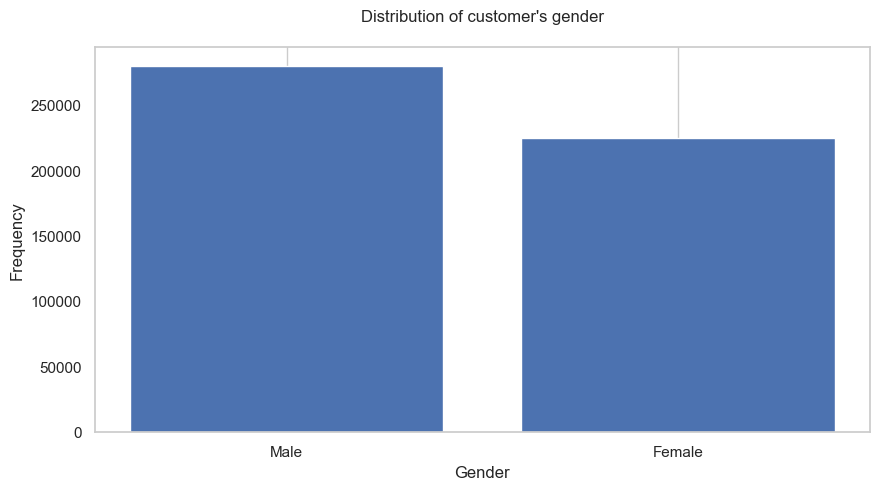

In [18]:
make_barplot(df, 'gender')

**_There are more male customers than female customers._**

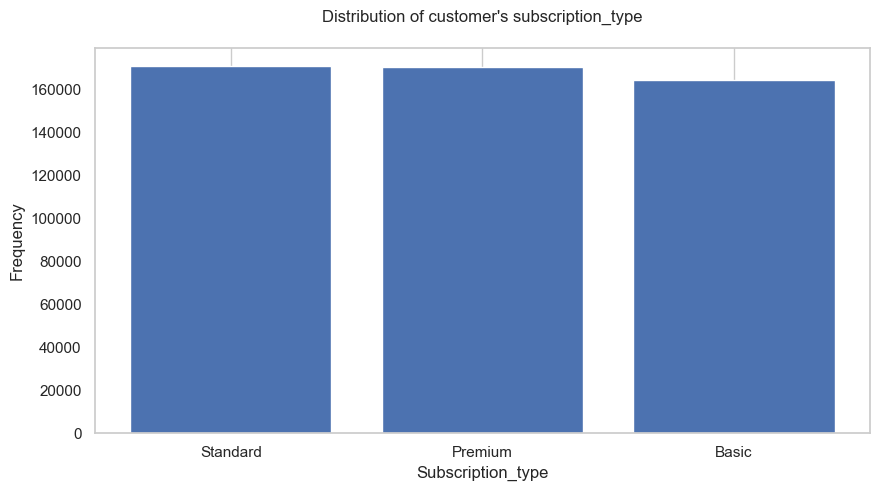

In [19]:
make_barplot(df, 'subscription_type')

**_There is a close balance between the three subscription types._**

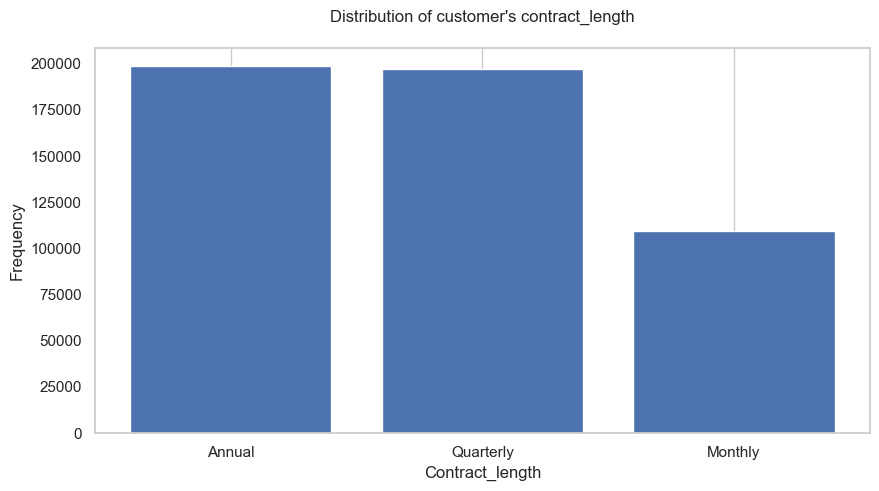

In [20]:
make_barplot(df, 'contract_length')

**_There is a very close balance between Annual and Quarterly contract lengths and they are also higher than the Monthly contract lengths._**

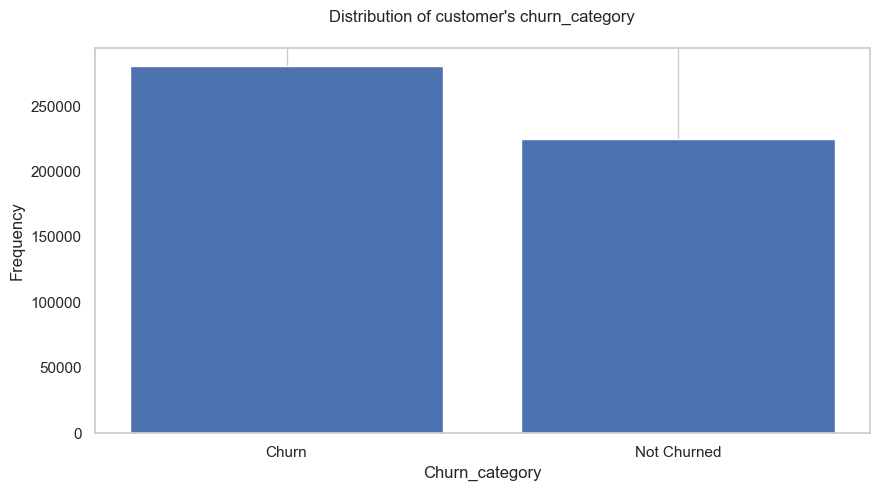

In [21]:
# Make a bar plot comparing the number of churn and not churn
filtered = df.copy()
filtered['churn_category'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]
make_barplot(filtered, 'churn_category')

**_There are more churn than not churned._**

### Discrete features

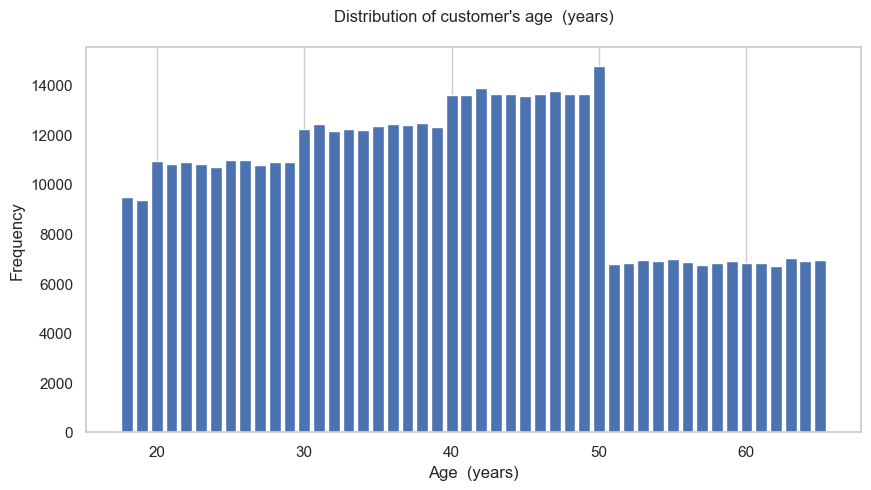


Summary statistics:
Mean: 40 years
Median: 40 years
Minimum: 18 years
Maximum: 65 years
Skewness: 0.144



In [22]:
make_barplot(df, target_feature='age', additional=' (years)', unit='years')

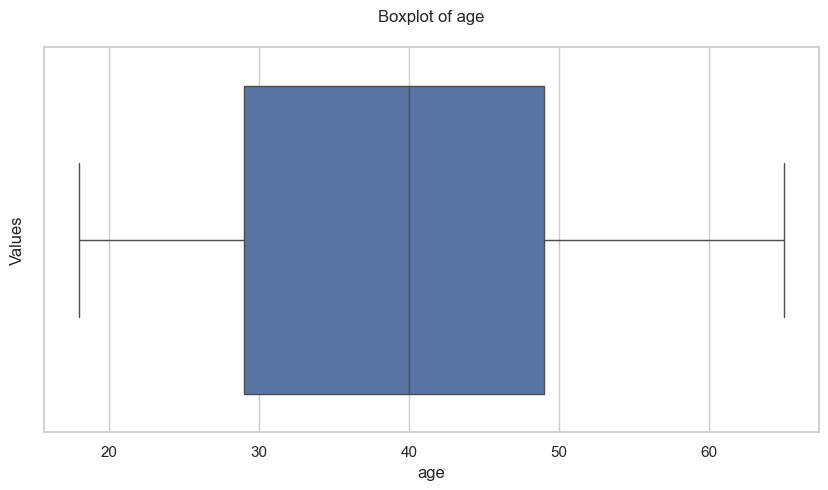

In [23]:
make_boxplot(df, 'age')

- The average customer age is 40 years, representing the overall tendency across the customer base.  
- Half of the customers are younger than 40, and the other half are older.  
- Customer ages span from 18 years (the youngest) to 65 years (the oldest), reflecting a diverse age group.  
- There are slightly more customers on the younger side of 40, but the difference is minimal, and the distribution is close to symmetrical.  


**_The customer base is well-distributed across ages, centered around 40 years, with a slightly larger proportion of younger customers. The age range suggests a mix of younger adults and older adults, making the customer demographic fairly balanced._**

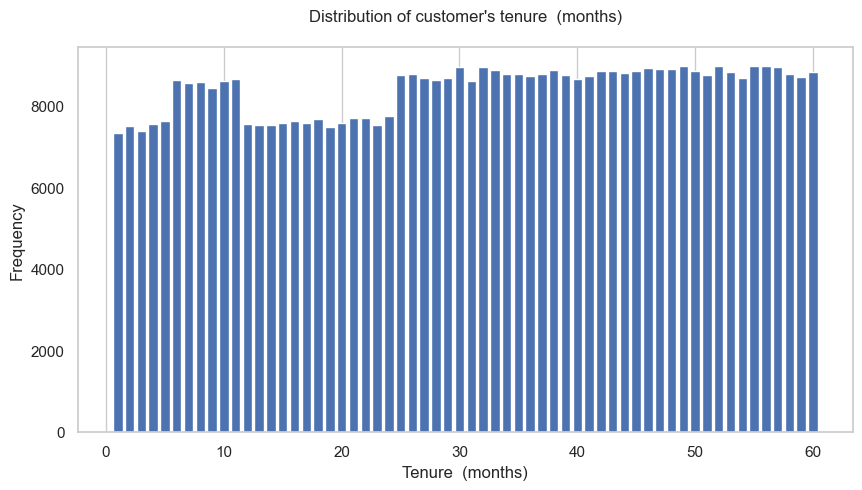


Summary statistics:
Mean: 31 months
Median: 32 months
Minimum: 1 months
Maximum: 60 months
Skewness: -0.070



In [24]:
make_barplot(df, 'tenure', additional=' (months)', unit='months')

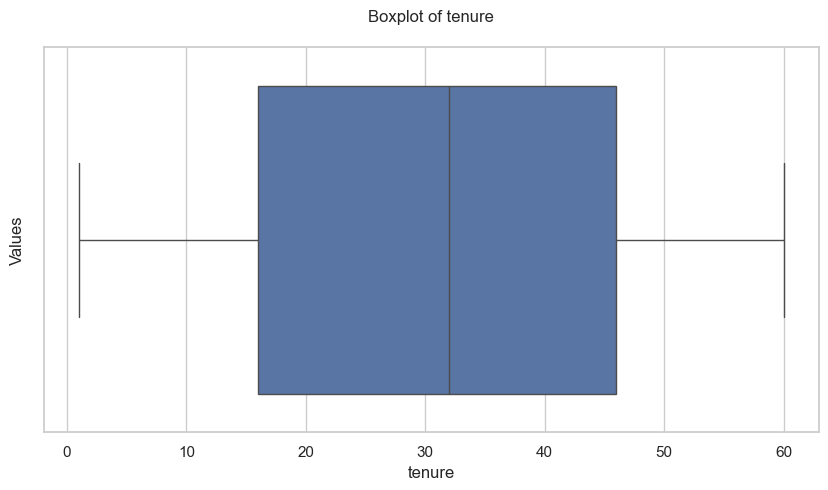

In [25]:
make_boxplot(df, 'tenure')

- On average, customers have been with the company for 31 months, indicating a relatively stable customer base.   
- Half of the customers have been with the company for more than 32 months and half for less.  
- Customer tenure spans from 1 month (new customers) to 60 months (long-term customers).  
- Tenure data is evenly distributed around the average, with no significant skew toward new or long-term customers._**  

  
**_In summary, the customer base is fairly balanced, with most customers staying for around 2.5 years, and the tenure data reflects a stable customer relationship._**

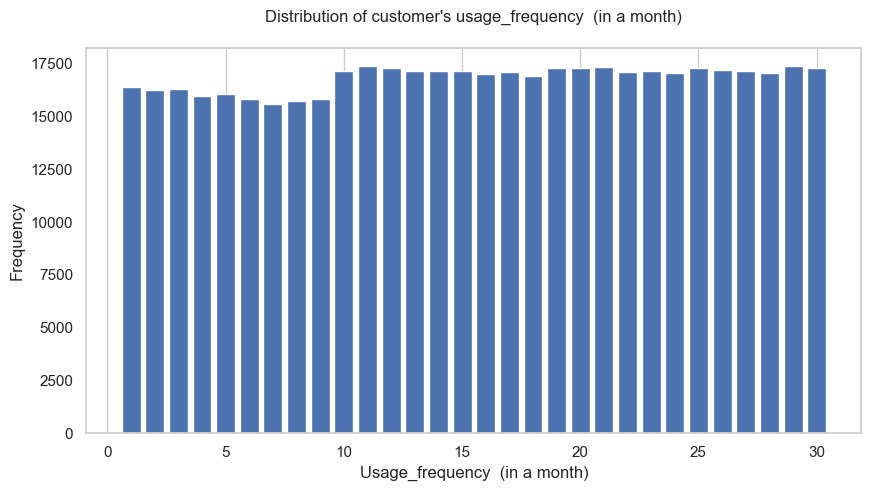


Summary statistics:
Mean: 16 times
Median: 16 times
Minimum: 1 times
Maximum: 30 times
Skewness: -0.034



In [26]:
make_barplot(df, 'usage_frequency', unit='times', additional=' (in a month)')

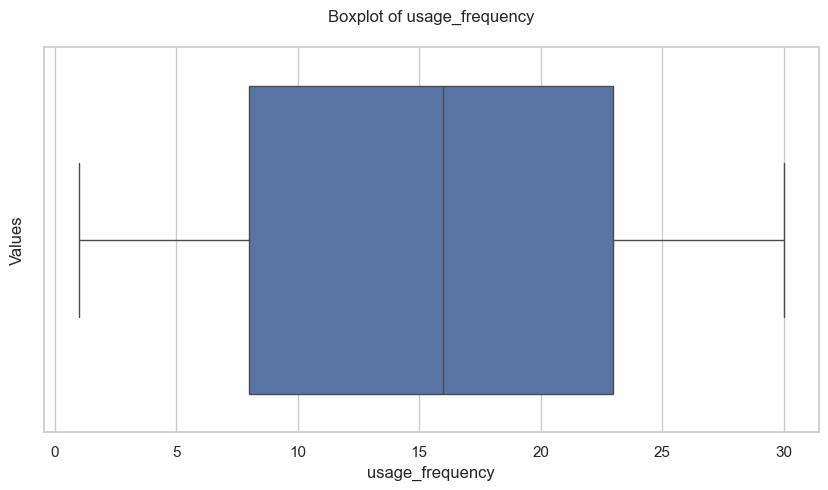

In [27]:
make_boxplot(df, 'usage_frequency')

- On average, customers use the service 16 times. This provides an overall measure of customer activity.  
- Half of the customers use the service less than 16 times, and half use it more. This indicates that the typical usage frequency is similar to the average, showing that the data is balanced.  
- Usage frequency ranges from 1 time (minimal usage) to 30 times (frequent usage), suggesting a broad variation in how often customers engage with the service.  
- The distribution of usage frequency is nearly symmetrical. There is no significant bias toward either very low or very high usage.  |


**_The usage frequency data is evenly distributed around the average value of 16 times, with no major outliers. Most customers tend to use the service around this frequency, though there are some with much lower or higher usage. The slight negative skew suggests that there may be a very small number of customers who use the service more frequently than the average._**

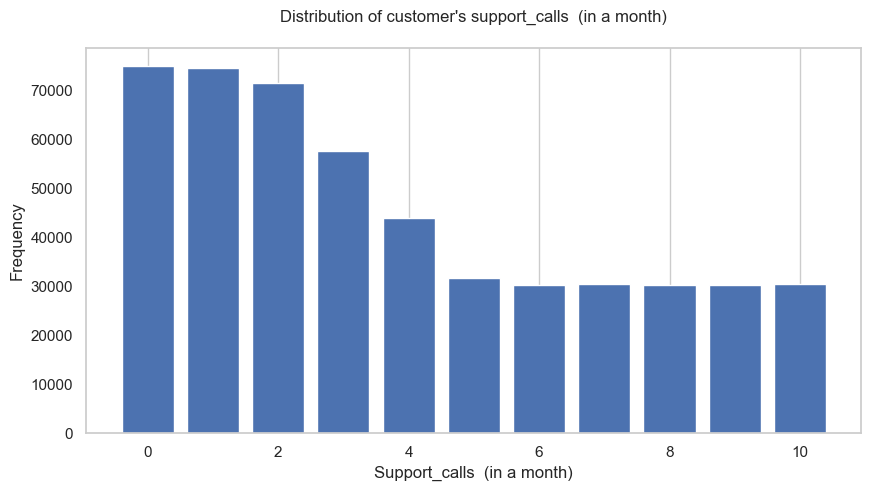


Summary statistics:
Mean: 4 calls
Median: 3 calls
Minimum: 0 calls
Maximum: 10 calls
Skewness: 0.544



In [28]:
make_barplot(df, 'support_calls', unit='calls', additional=' (in a month)')

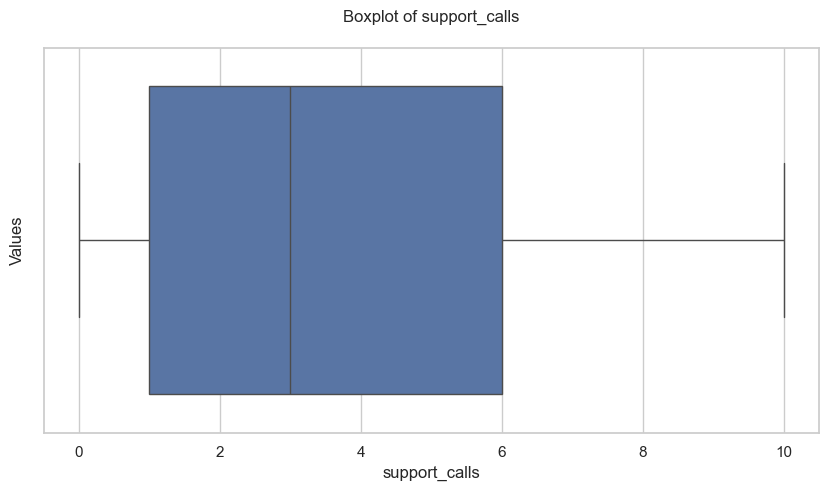

In [29]:
make_boxplot(df, 'support_calls')

- Average Support Calls (Mean): On average, customers make 4 support calls in a month, providing a general sense of customer service usage.  
- Half of the customers make fewer than 3 support calls, and half make more. This suggests that while the average is 4 calls, many customers make fewer calls.  
- Support calls range from 0 calls (no support calls in the month) to 10 calls, indicating that some customers rarely contact support, while others may need frequent assistance.  
- There are relatively more customers who make fewer support calls, but there is a tail of customers who make a higher number of calls. The distribution is not perfectly symmetrical, and the presence of a few high-frequency callers pulls the average higher._**

**_Most customers make fewer support calls, with 3 calls being the typical amount. However, there is a small group of customers who require significantly more support, which raises the average to 4 calls. The positive skew suggests that while most customers are relatively low-contact, a few individuals may require frequent assistance._**

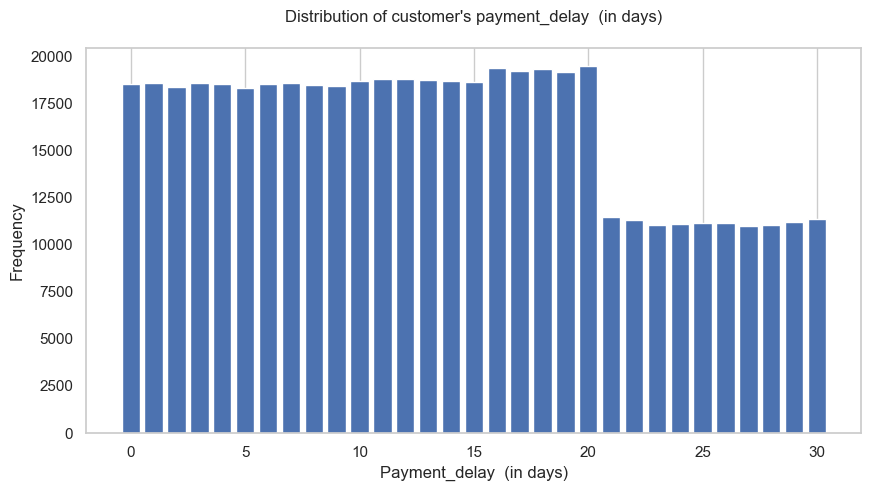


Summary statistics:
Mean: 13 days
Median: 13 days
Minimum: 0 days
Maximum: 30 days
Skewness: 0.200



In [30]:
make_barplot(df, 'payment_delay', unit='days', additional=' (in days)')

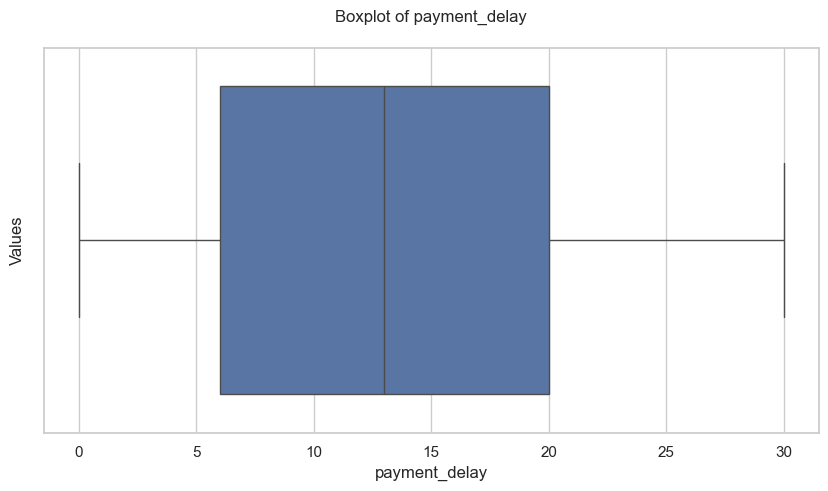

In [31]:
make_boxplot(df, 'payment_delay')

- Half of the customers have a payment delay of less than 13 days, while half have a payment delay of more than 13 days. This is the typical payment delay for most customers.  
- Payment delays range from 0 days (no delay) to 30 days (maximum delay), suggesting that some customers make timely payments, while others may take up to a month.  
- While most customers have shorter payment delays (closer to 0 days), there is a small tail of customers who take longer to pay (up to 30 days). The distribution is slightly right-skewed, with more customers paying quickly but a few who take longer.  


**_Most customers tend to pay within 13 days, with a relatively small group taking longer to settle their payments. The slight positive skew indicates that while most customers pay promptly, there is a small portion who cause delays, contributing to a higher average payment delay._**

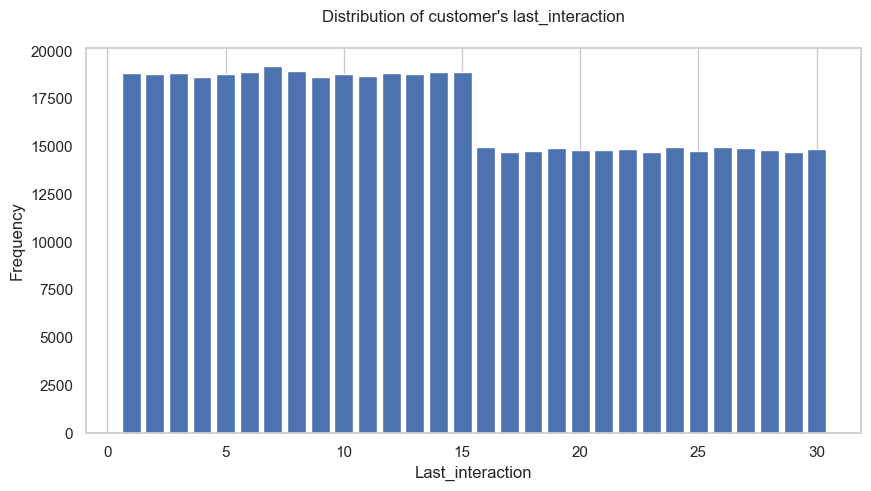


Summary statistics:
Mean: 15 days
Median: 14 days
Minimum: 1 days
Maximum: 30 days
Skewness: 0.155



In [32]:
make_barplot(df, 'last_interaction', unit='days', additional='')

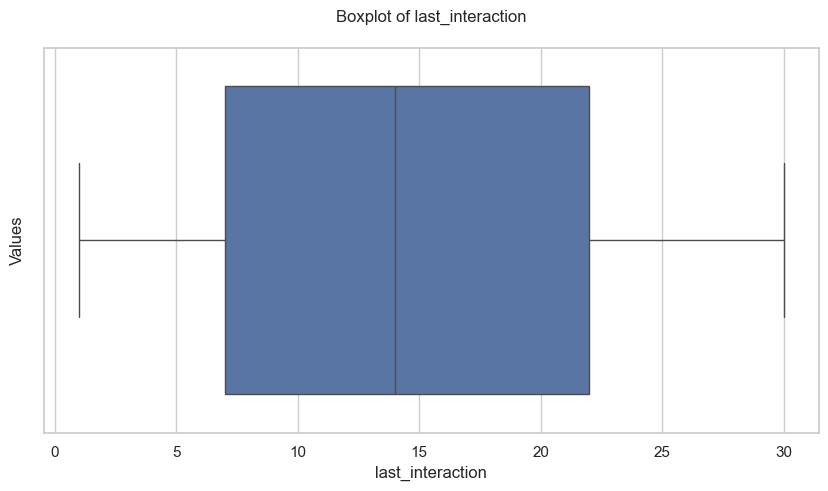

In [33]:
make_boxplot(df, 'last_interaction')

- On average, the time since the last interaction is 15 days. This provides an overall idea of how recently customers are engaging with the service.  
- Half of the customers interacted with the service more recently than 14 days ago, and half interacted more than 14 days ago. This indicates that most customers have relatively recent interactions, with the median slightly lower than the average.  
- The time since the last interaction ranges from 1 day (most recent interaction) to 30 days (a month since the last interaction), suggesting that some customers engage very frequently, while others may not have interacted in the past month.  
- While most customers have had recent interactions (closer to 1 day), there are a few customers who haven't interacted for a longer period, which pulls the average slightly higher.

**_Most customers have interacted with the service within the last 14 days, with a small proportion of customers having more extended gaps between interactions. The slight positive skew indicates that while most customers engage relatively recently, there is a small group of customers who haven't interacted in the past few weeks, influencing the average slightly._**

### Continuous Data

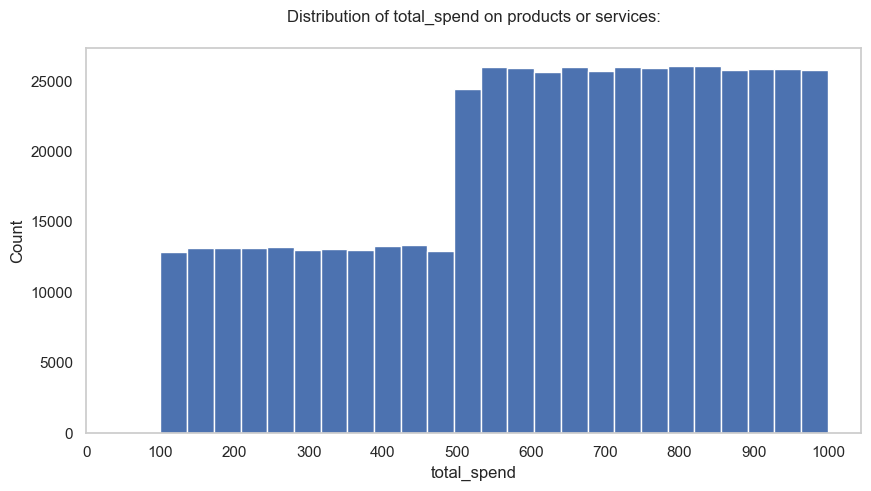

Distribution of total_spend on products or services: 620.07 ± 648.90 USD
Median: 648.90 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.395 Skewness



In [34]:
make_histogram(df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

## Continuous Data

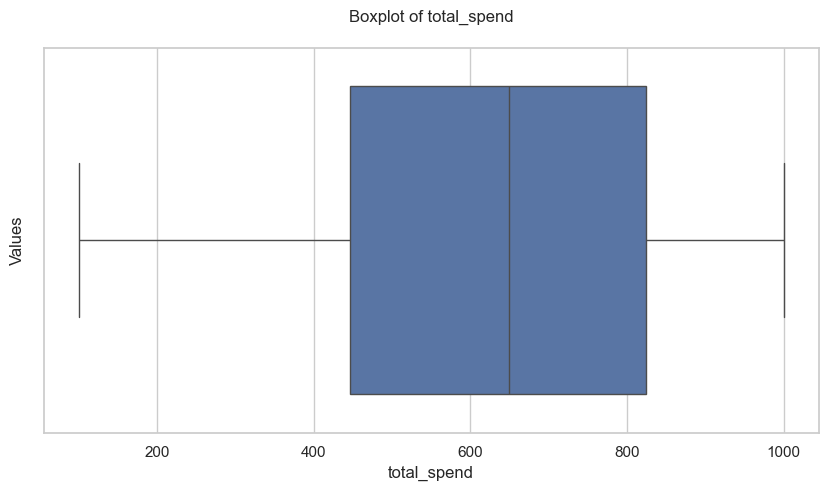

In [35]:
make_boxplot(df, 'total_spend')

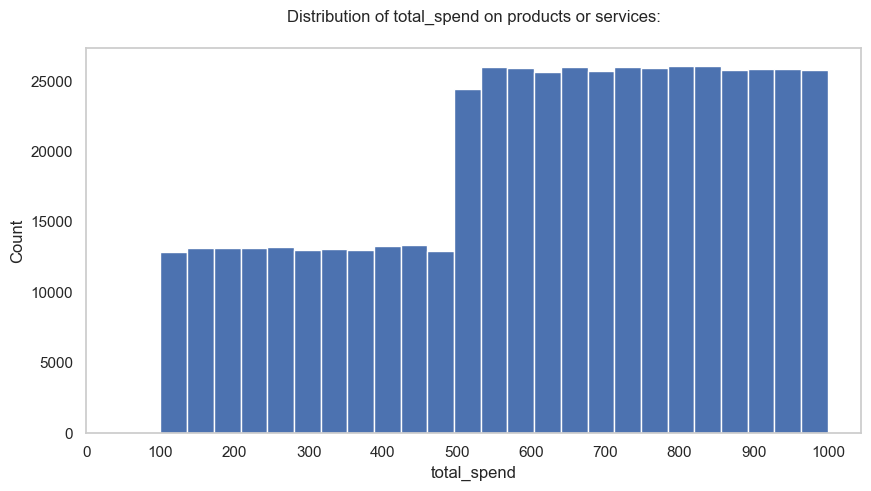

Distribution of total_spend on products or services: 620.07 ± 648.90 USD
Median: 648.90 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.395 Skewness



In [36]:
make_histogram(df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

- The average spend is 620.07 USD, which gives a general idea of how much customers typically spend. However, this value is significantly lower than the median, suggesting that the spend distribution might be skewed by some very high spenders.  
- Half of the customers spent more than 648.90 USD, and half spent less. The median is higher than the mean, which indicates that there are some customers with very high spending that are pulling the average down.  
- The spend ranges from a minimum of 100.0 USD (the least amount spent) to a maximum of 1,000.0 USD (the most spent). This suggests a broad variation in customer spending, with some customers making modest purchases while others spend much more.
- The distribution of spending is slightly skewed toward the lower end (more customers spend on the lower side of the range), though the skew is not very strong. A negative skew suggests there may be a larger number of customers making smaller purchases, with a few high spenders pulling the distribution in the opposite direction.


**_Most customers tend to spend around 648.90 USD, which is the typical amount, while the average spend of 620.07 USD is slightly lower due to a small number of customers spending significantly less. The slight negative skew suggests that while there are customers who spend a lot, the majority tend to spend more modest amounts, with fewer customers making very low-value purchases._**

## Multivariate Analysis

### Do gender and churn rate have any relationship?

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x18e04d05430>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Gender wise churn rate')

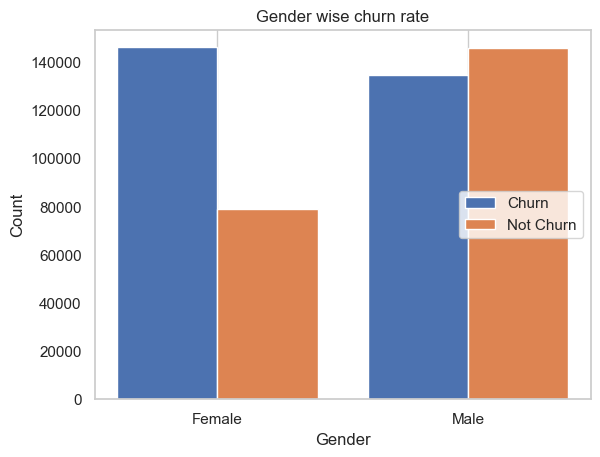

In [37]:
gender_churn = df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

**_Female customers have a slightly higher churn rate than male customers. The number of active male customers (non-churned) is nearly double that of female customers._**

### Are there any noticeable trends in payment delays among customers who churned?

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 31 artists>

<BarContainer object of 31 artists>

([<matplotlib.axis.XTick at 0x18e04a4ba10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

Text(0.5, 0, 'Customer payment delays in days')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on payment delays')

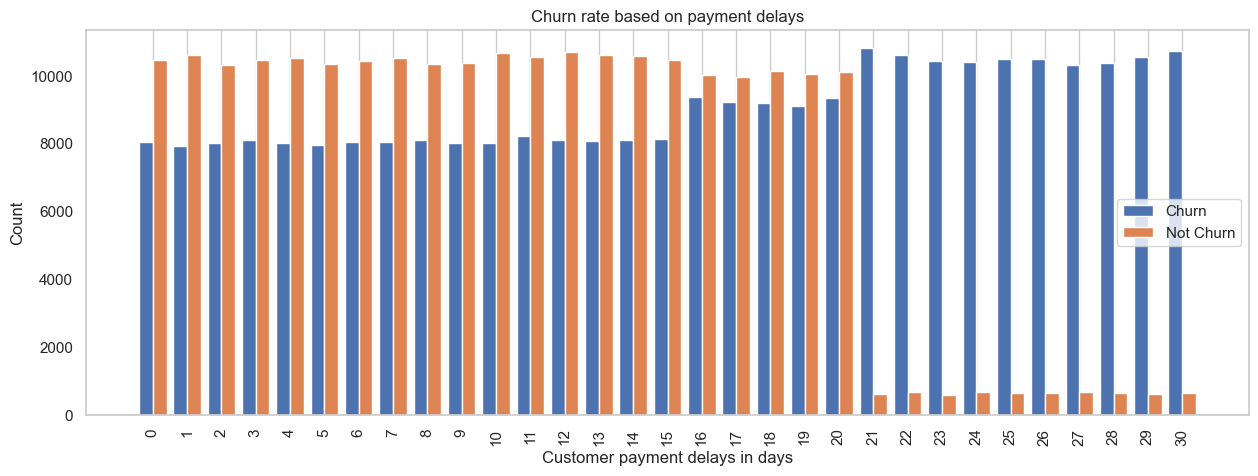

In [38]:
filtered = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

**_Customers who have not churned generally experience higher payment delays compared to churned customers up to day 20. However, after day 20, churned customers exhibit payment delays that are more than 10 times longer than those of non-churned customers._**

### What is the distribution of usage frequency for churned vs. non-churned customers?

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 30 artists>

<BarContainer object of 30 artists>

([<matplotlib.axis.XTick at 0x18e0052fe60>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30')])

Text(0.5, 0, "Customer's company services usage frequency")

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on usage frequency')

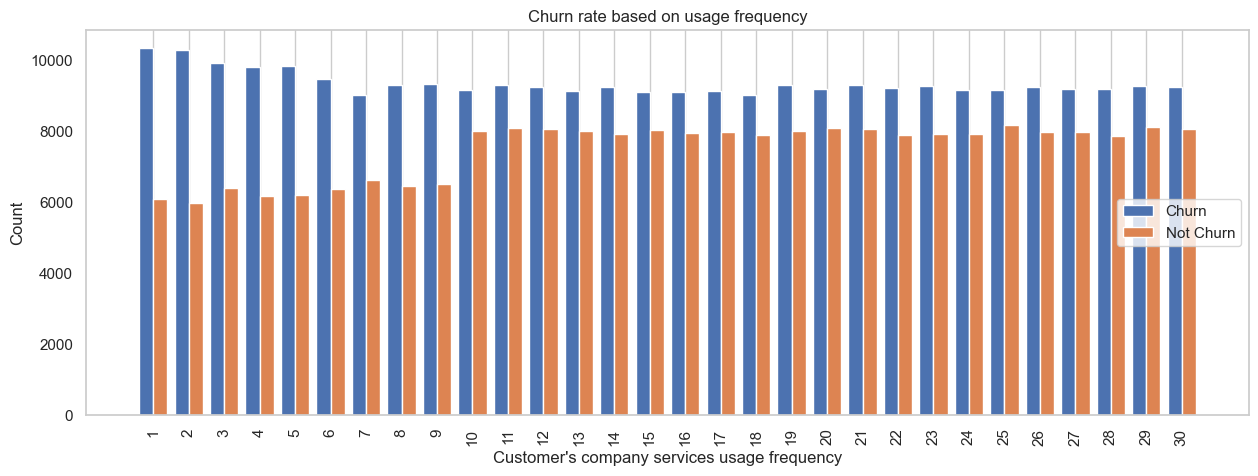

In [39]:
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

**_Churned customer tend to use company's services significantly more than customers who have not churned._**

- High Engagement Before Churn: Churned customers may have been highly engaged with the company's services initially, which could indicate that they were satisfied or found value in the services at first. This suggests that the company may have been able to attract and retain these customers early on, but was not able to sustain their engagement.
- Potential Issue with Long-Term Retention: The fact that churned customers used the service more might indicate that while they initially used the service frequently, there could be factors that led to dissatisfaction or a lack of value in the long term, causing them to churn. The company might need to improve customer retention strategies after the initial high engagement.
- Customer Fatigue or Service Saturation: It could also suggest that churned customers reached a point of saturation or fatigue with the service, where the value they derived from it diminished over time, leading to their eventual departure.
- Possible Over-reliance on Frequent Usage: If the company focuses primarily on high engagement to keep customers, it might not be addressing deeper issues such as customer support, features, or overall satisfaction that can sustain long-term relationships. The company may need to look beyond usage frequency and focus on continuous value delivery to retain customers.
  
  
**_In conclusion, while high usage can be a good indicator of initial satisfaction, the company may need to focus on factors that maintain customer engagement over time and address the reasons why high usage doesn't necessarily equate to long-term loyalty._**

### Are customers with longer tenures less likely to churn?

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x18e04d37980>,
 [Text(0, 0, '0 to 10 months'),
  Text(1, 0, '11 to 20 months'),
  Text(2, 0, '21 to 30 months'),
  Text(3, 0, '31 to 40 months'),
  Text(4, 0, '41 to 50 months'),
  Text(5, 0, '51 to 60 months')])

Text(0.5, 0, 'Tenures')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on tenures')

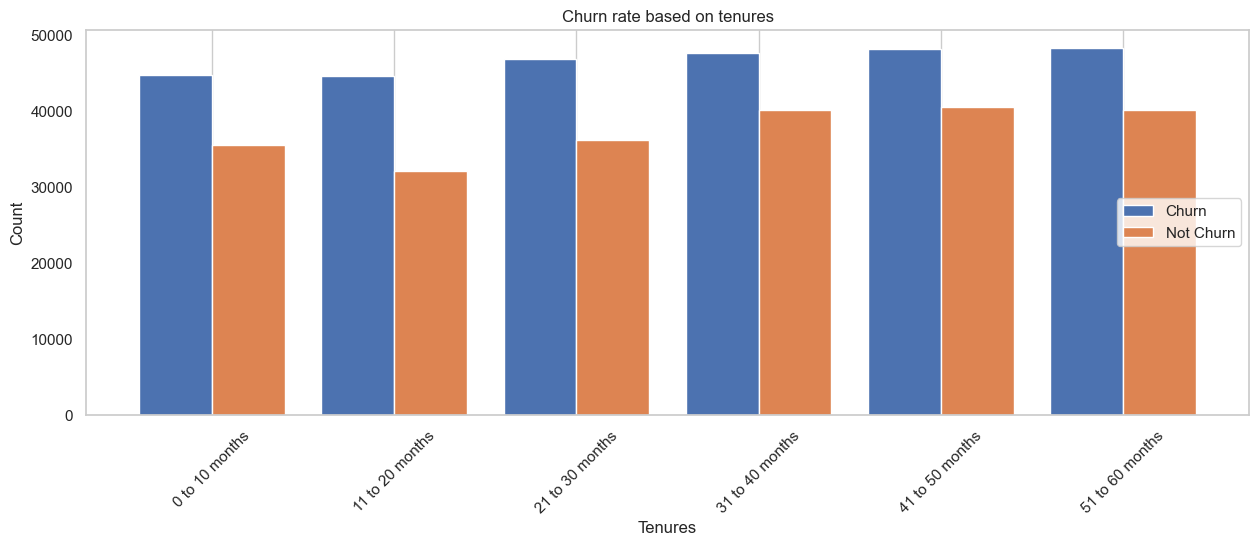

In [40]:
def categorize_age(age):
    if 0 <= age <= 10:
        return '0 to 10 months'
    elif 11 <= age <= 20:
        return '11 to 20 months'
    elif 21 <= age <= 30:
        return '21 to 30 months'
    elif 31 <= age <= 40:
        return '31 to 40 months'
    elif 41 <= age <= 50:
        return '41 to 50 months'
    elif 51 <= age <= 60:
        return '51 to 60 months'
    else:
        pass # For nan values

filtered = df.copy()
filtered['tenure_segmentation'] = df['tenure'].apply(categorize_age)
filtered = filtered.groupby(['tenure_segmentation', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

 **_Customers with longer tenures are more likely to churn._**
 
Despite being with the company for an extended period, these customers may have experienced diminishing satisfaction or value over time. This could indicate:

- Service Fatigue or Stagnation: Long-tenured customers might feel that the service has become repetitive or no longer meets their evolving needs, leading them to consider alternatives.
- Lack of Engagement or Innovation: The company may not have introduced enough new features, updates, or incentives to keep long-term customers engaged, making them more prone to churn as they seek better or more innovative offerings elsewhere.
- Saturation: Customers who have been with the company for a long time may have already fully utilized the product or service, and without new offerings or upgrades, they might lose interest.
- Customer Expectations: As customers stay longer, their expectations tend to grow. If these expectations aren't met, even loyal customers may decide to churn.

**_In summary, longer tenures don't always correlate with loyalty. The company needs to focus on continuous improvement and customer satisfaction to prevent churn among long-term customers._**

### Do customers who calls more tend to churn more?

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

([<matplotlib.axis.XTick at 0x18e0434e9f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

Text(0.5, 0, 'Customer Support Calls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on support calls made by customers')

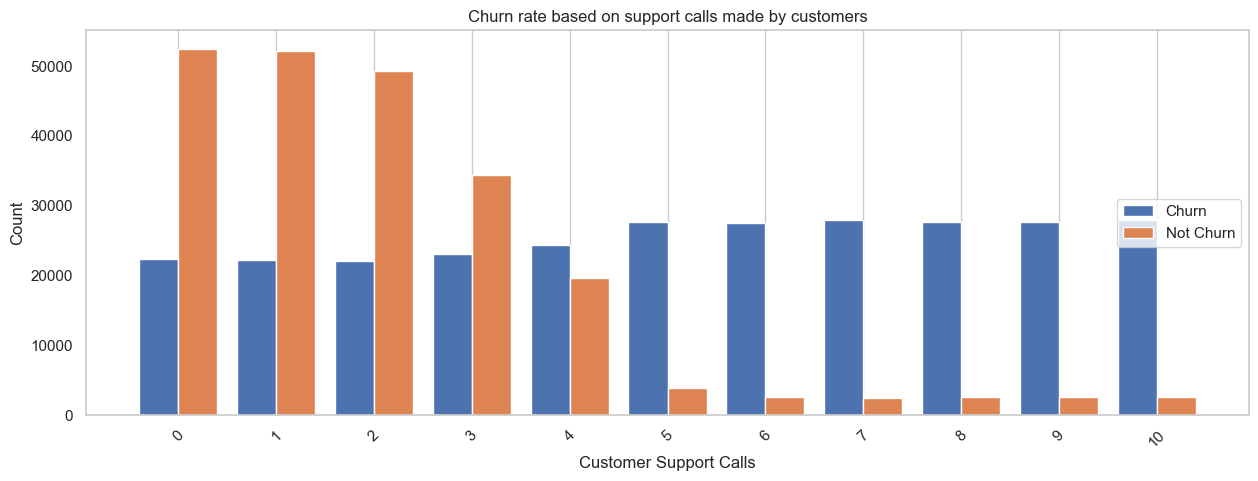

In [41]:
filtered = df.groupby(['support_calls', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

**_Customers with more support calls tend to churn more._**  

  
This suggests a relationship between customer dissatisfaction and the need for assistance.

- Higher Support Calls Indicate Dissatisfaction: Customers who require more support calls are likely facing ongoing issues or challenges with the company's product or service. This could be a sign of dissatisfaction, which increases the likelihood of churn as customers may feel that their problems are not being adequately addressed.
- Low Support Call Frequency in Non-Churned Customers: Customers who are not churned tend to make fewer support calls, specifically between 0 to 3 calls, suggesting that they have fewer issues or are more satisfied with the service. These customers are more likely to remain loyal since they require less intervention.
- Escalation of Issues Among Churned Customers: After the initial 3 calls, churned customers make significantly more calls, indicating that their problems may have escalated or remained unresolved, leading to frustration. This increased need for support is often a precursor to churn, as customers who feel their issues are not being addressed are more likely to leave.


**_The data indicates that the need for frequent customer support is closely tied to churn. While non-churned customers make fewer calls and are generally more satisfied, churned customers tend to require more support, suggesting dissatisfaction or unresolved issues. Addressing customer concerns earlier and reducing the need for support could help improve retention rates._**

### Does the subscription type influence the churn rate?

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x18e03eb3470>,
 [Text(0, 0, 'Basic'), Text(1, 0, 'Premium'), Text(2, 0, 'Standard')])

Text(0.5, 0, 'Subscription Type')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on subscription type')

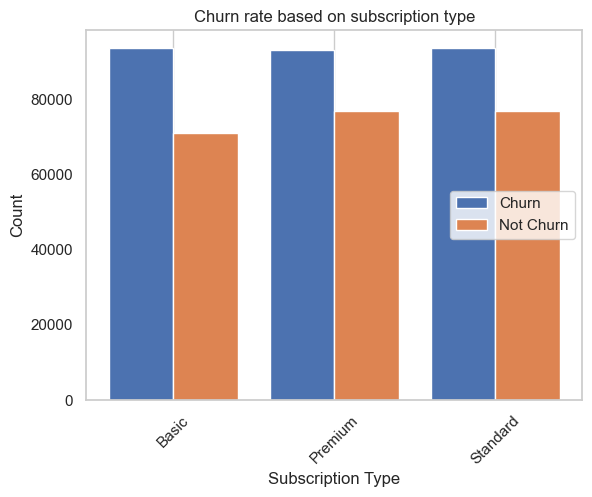

In [42]:
filtered = df.groupby(['subscription_type', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

**_The subscription type does not influence customer churn rate._**

### Is there a pattern in contract length for customers who churned?

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x18e0066e6c0>,
 [Text(0, 0, 'Monthly'), Text(1, 0, 'Quarterly'), Text(2, 0, 'Annual')])

Text(0.5, 0, 'Contract Length')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn rate based on contract length')

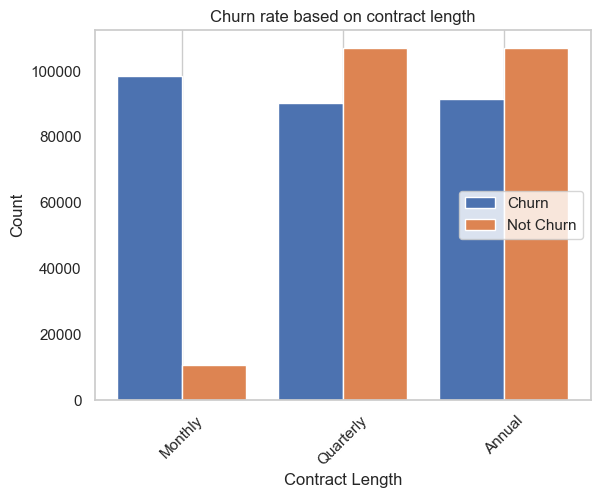

In [43]:
# Custom order for the contract lengths
contract_order = ['Monthly', 'Quarterly', 'Annual']

# Assuming filtered DataFrame is already created
filtered = df.groupby(['contract_length', 'churn']).size().unstack()

# Reorder the index of the filtered DataFrame based on the custom order
filtered = filtered.reindex(contract_order)

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Create the bar plot
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn')

# Set custom ticks
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

 **Customers with quarterly contract lengths have the lowest churn rate, while those with monthly contract lengths exhibit the highest churn rate._**  


- Stability with Quarterly Contracts: Customers on quarterly contracts are less likely to churn, indicating that these customers may have a stronger commitment to the service or may perceive greater value in the longer commitment. The relatively longer contract period may provide more time for the company to build loyalty or deliver value.
- Instability with Monthly Contracts: Customers on monthly contracts show a higher churn rate, likely because the shorter contract period allows for greater flexibility, which may also make it easier for customers to leave once they encounter dissatisfaction. Monthly contracts may attract customers who are not yet fully committed, leading to a higher turnover rate.
- Preference for Annual and Quarterly Contracts Among Non-Churned Customers: Customers who do not churn tend to prefer annual and quarterly contracts, suggesting that longer-term contracts are seen as more stable or offer better value. These customers are likely more committed and satisfied, as they are willing to make longer-term financial commitments, reducing their likelihood of churn.


**_The data indicates that customers with quarterly or annual contracts tend to stay longer, possibly due to a stronger commitment or perceived value, whereas monthly contracts are associated with higher churn, likely due to the flexibility they offer. The company could consider incentivizing longer contract lengths or providing more benefits for long-term commitments to improve customer retention._**

### Is there a correlation between total spend and churn rate?

<Axes: xlabel='total_spend', ylabel='Density'>

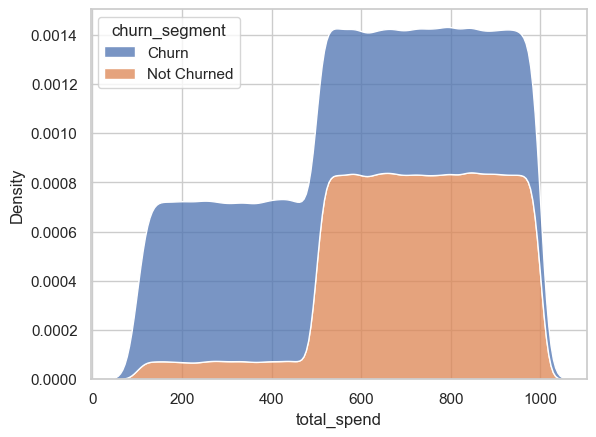

In [44]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]

sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack")
plt.show()

**_Customers who churn tend to spend significantly more money than those who don't._**  


**1. Higher Spending Among Churned Customers:**  
- Churned customers tend to have higher spending, which could indicate that these customers may have been using the company's products or services more intensively or for a longer period before deciding to leave. This higher spending could reflect an initial period of satisfaction or a commitment to higher-tier offerings, which ultimately did not prevent them from churning.
- It might also suggest that churned customers may have invested more in the service or product but eventually found less value over time or faced dissatisfaction, leading them to discontinue.
  

**2. Similar Spending Patterns Across Churned and Non-Churned Customers:**
- Despite the higher spending observed among churned customers, both churned and non-churned customers share a similar total spending distribution. This implies that the spending behaviors of these two groups follow a similar pattern, meaning that the differences in spending are not drastic.
- The overlap in spending patterns could indicate that both groups are somewhat similar in terms of the types of products or services they purchase, even though churned customers end up leaving. This might point to the fact that, while churned customers spent more initially, they followed the same general spending trajectory as those who stayed.


**3. Possible Reasons for Churn Despite Higher Spending:**
- Saturation or Diminished Value: Churned customers might have spent more initially, but over time, they may have found the value or benefits of the service decreased, leading to dissatisfaction and churn.
- Misalignment of Expectations: Customers who spend more may have higher expectations, and if the service fails to meet those expectations, they are more likely to leave.

**_The analysis suggests that while spending more does not necessarily correlate with loyalty, churned customers tend to have a higher initial spend, possibly due to greater investment in higher-tier products or services. However, despite these differences, the overall spending behavior between churned and non-churned customers follows similar patterns, indicating that factors other than spending—such as service satisfaction, support, or engagement—play a significant role in the decision to churn._**

## Correlation

### Independent Features

In [45]:
independent_features_df = df.select_dtypes(include=['number']).copy().drop(columns=['churn'])

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Independent Features Correlation Heatmap')

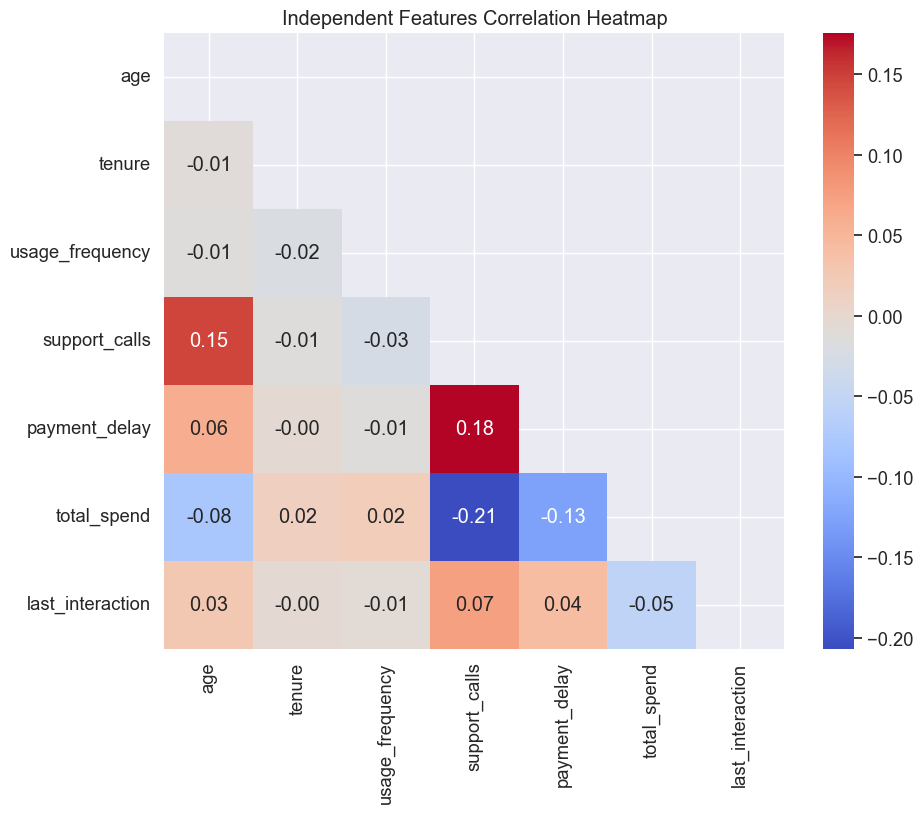

In [46]:
corr_matrix = independent_features_df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Independent Features Correlation Heatmap")
plt.show()

### Inpedendent features correlation with prediction labels

<Figure size 500x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap between Independent Features and Churn')

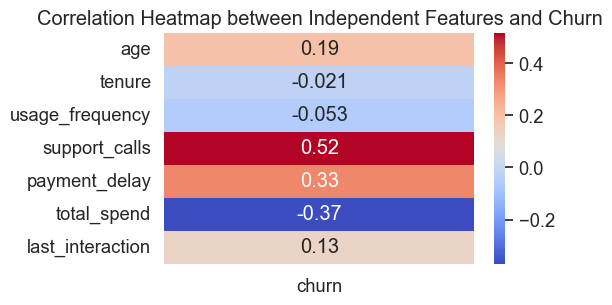

In [47]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()